## Aman Pandey

## Data Science And Bussiness Analytics Intern @The Sparks Foundation

## Task-4 Exploratory Data Analysis: Terrorism

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [28]:
df=pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')

In [29]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#### Data Cleaning

In [30]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

### we can see that the columns name are erroneous
### so we will change the columns name

In [31]:
# renaming the columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':
                  'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                  'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                   'targtype1_txt':'TargetType','weaptype1_txt':'Weapon_type','motive':'Motive',
                  'extended':'Extended'},inplace=True)

In [32]:
df.columns

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'Extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [33]:
df.shape

(181691, 135)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [35]:
df.describe()

,eventid,Year,Month,Day,Extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
## finding the null value
df.isnull().sum()

eventid            0
Year               0
Month              0
Day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [15]:
#removing the null value

In [37]:
df.dropna()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related


In [38]:
# remove all columns with at least one missing value
columns_with_na_dropped = df.dropna(axis=1)
columns_with_na_dropped.head()

,eventid,Year,Month,Day,Extended,country,Country,region,Region,vicinity,...,Group,individual,weaptype1,Weapon_type,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,...,MANO-D,0,13,Unknown,0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,0,...,23rd of September Communist League,0,13,Unknown,0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,0,...,Unknown,0,13,Unknown,0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,0,...,Unknown,0,6,Explosives,1,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,0,...,Unknown,0,8,Incendiary,1,PGIS,-9,-9,1,1


In [39]:
df=df[['Year','Month','Day','Country','State','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','TargetType','Weapon_type','Motive']]
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)

In [40]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed              0
Wounded             0
Target            636
Summary         66129
Group               0
TargetType          0
Weapon_type         0
Motive         131130
dtype: int64

## Data insight

In [41]:

print('Country with the most attacks:',df['Country'].value_counts().idxmax())
print('City with the most attacks:',df['city'].value_counts().index[1])

Country with the most attacks: Iraq
City with the most attacks: Baghdad


In [42]:
print('Region with the most attacks:',df['Region'].value_counts().idxmax())

Region with the most attacks: Middle East & North Africa


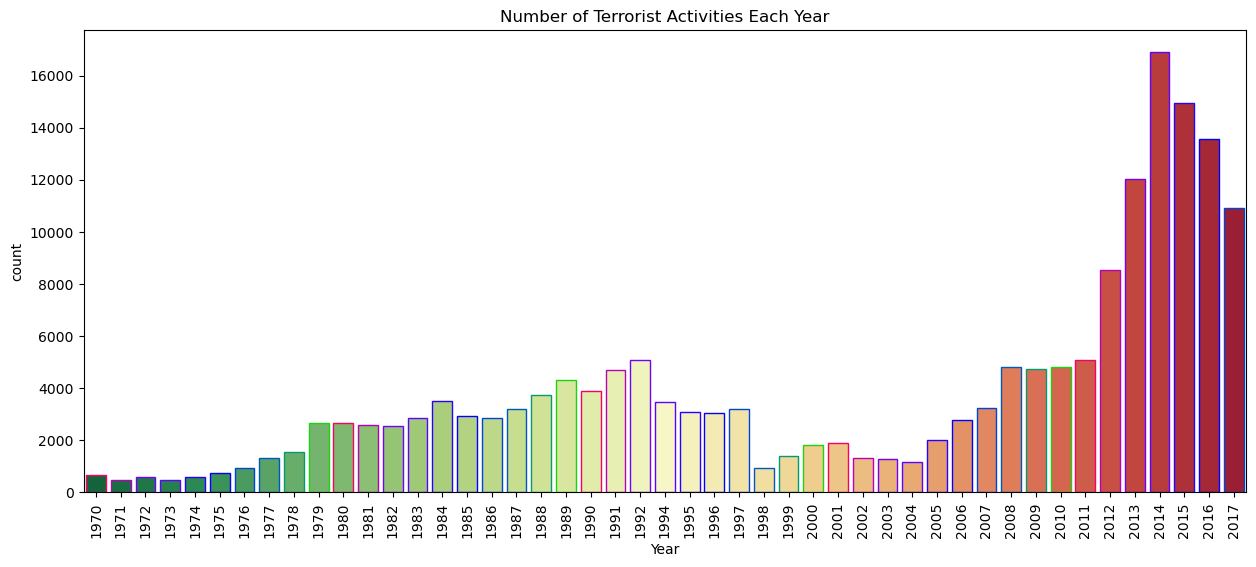

In [43]:
# Terrorist Activities each year
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('prism',10))
plt.xticks(rotation=90)
plt.title('Number of Terrorist Activities Each Year')
plt.show()

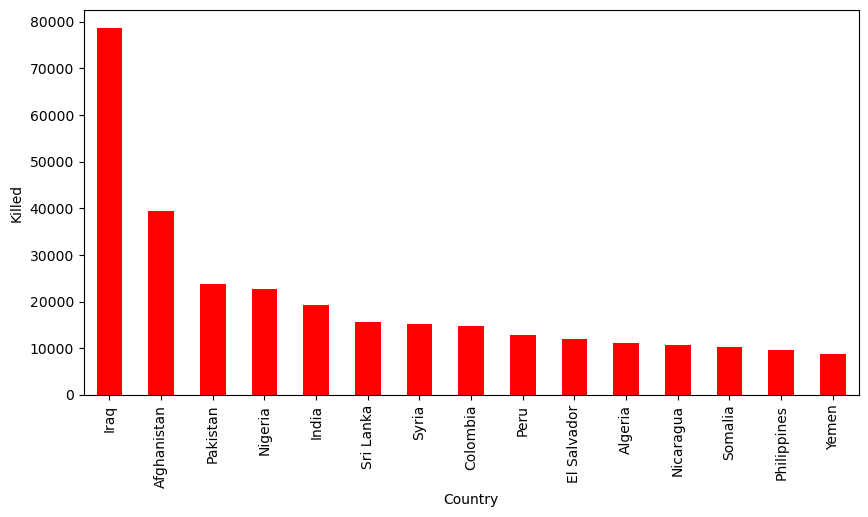

In [48]:
plt.figure(figsize = (10,5))
df.groupby(['Country'])['Killed'].sum().sort_values(ascending = False).head(15).plot(kind = 'bar', color = 'red')

plt.xticks(rotation=90)
plt.ylabel("Killed")
plt.show()

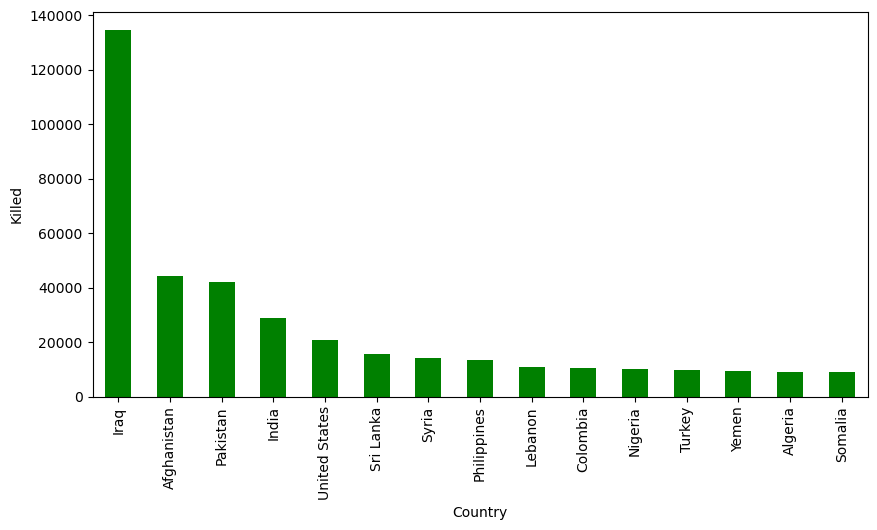

In [50]:
plt.figure(figsize = (10,5))
df.groupby(['Country'])['Wounded'].sum().sort_values(ascending = False).head(15).plot(kind = 'bar', color = 'green')

plt.xticks(rotation=90)
plt.ylabel("Killed")
plt.show()

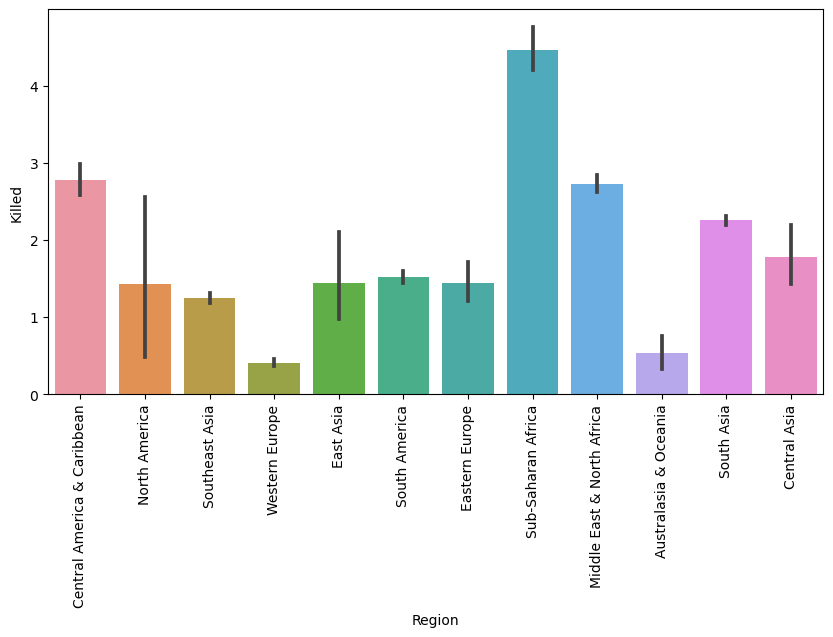

In [51]:
plt.figure(figsize = (10,5))
sns.barplot(x='Region',y='Killed',data=df)
plt.xticks(rotation=90)
plt.ylabel("Killed")
plt.show()

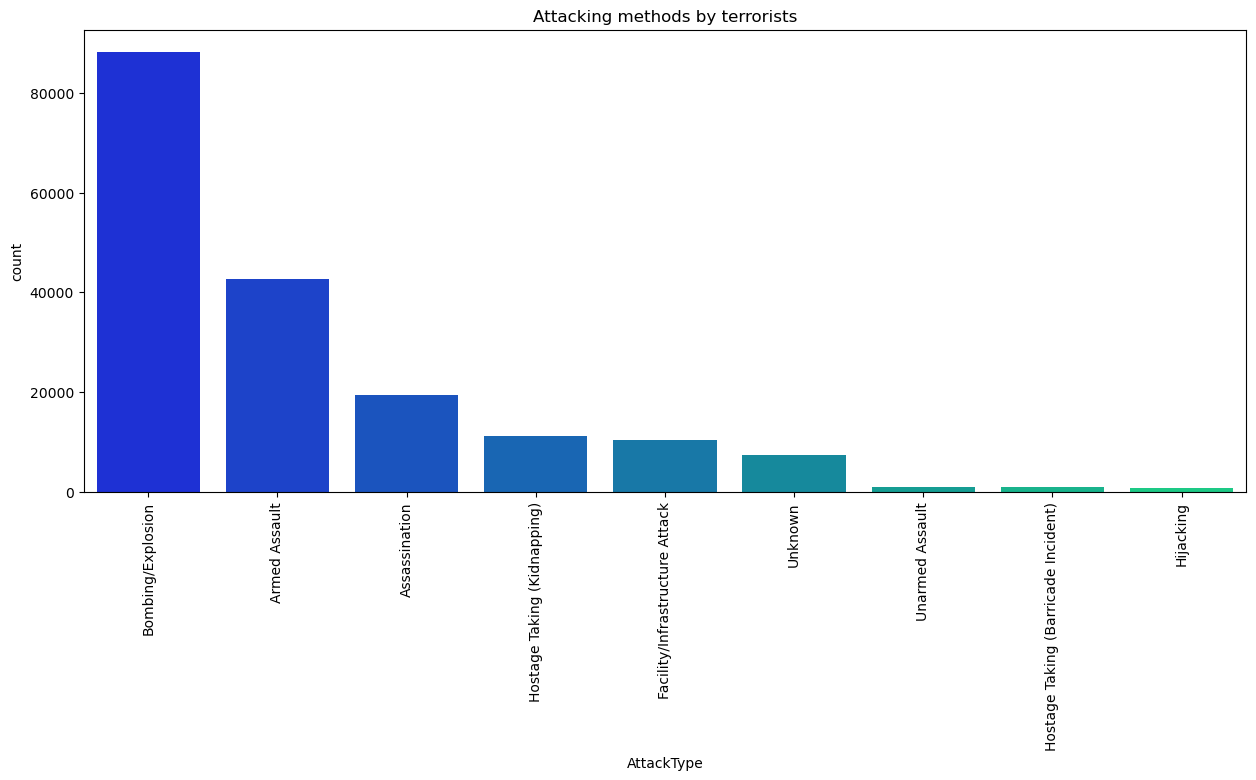

In [52]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=df,palette='winter',order=df['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Attacking methods by terrorists")
plt.show()

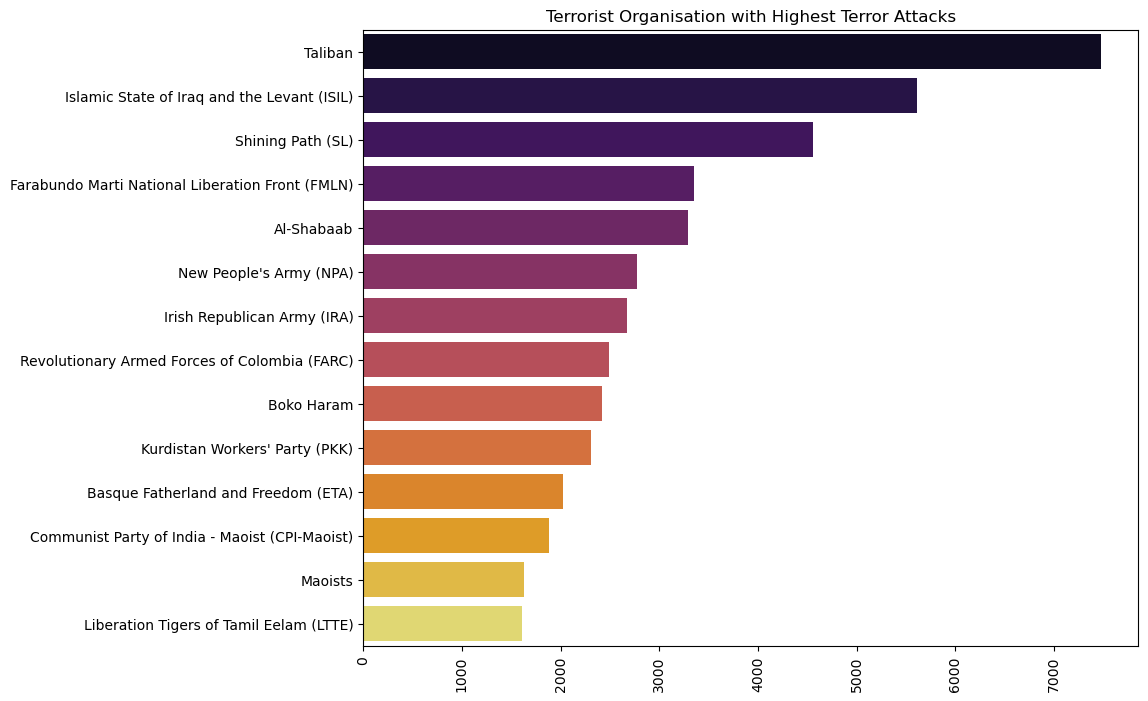

In [53]:
sns.barplot(df['Group'].value_counts()[1:15].values,df['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Organisation with Highest Terror Attacks')
plt.show()

## CONCLUSIONS :
#### So after different type of analyzation ,Overall terrorism is suddenly increased from 2010 and I have ranked the Hot zone in terms of terrorist activities in all regions -

# Middle East & North Africa
Iraq
Overall having highest Number of terrorist rate and sudden increase in terrorist activity after year 2010

Libya
Overall having low terrorism activity, Second Highest in terms of successful terrorist activities which takes place in this country and an increased in terrorism rate after 2010.

Yemen
Overall having low terrorism activity, Third Highest in terms of successful terrorist activities which takes place in this country and an increased in terrorism rate after 2010.

# South Asia
Pakistan
Overall having 1st highest terrorist rates but if we consider extended terrorist rate so this country is 2nd highest and a very high increase in terrorism rate after 2010.

Afghanistan
Overall having 2nd Highest terrorist rates and 1st highest in terms of extended terrorist rates and a very high increase in terrorism rate after 2010.

India
Overall having 3rd highest terrorist rates but there is a good decrease in terrorist rates if we consider the 20s century and an increase in terrorism rate after 2010 but not as that of increase like Afghanistan and Pakistan.

# Sub-Saharan Africa
Nigeria
Overall having low terrorism activity but 1st Highest in terms of extended terrorist activities which takes place in this country and 2nd in terms of increased of terrorism rate after 2010.

Somalia
Overall having low terrorism activity but 2nd Highest in terms of extended terrorist activities which takes place in this country and 1st in terms of increased of terrorism rate after 2010.

Sudan
Overall having low terrorism activity but 3rd Highest in terms of extended terrorist activities which takes place in this country and a bit increase in terrorism rate after 2010.

# Solution
- More security surveillance required at Iraq.
- Noticing the trends of terrorism activities , hugely populated regions suffer major kill ratios. This must be controlled with strict border rules
- Impose strict rules in controlling the explosions produce worldwide limiting the number of supplies
- High alert at densly populated locations in each city as it is noticed that terrorists target is private citizens and property